# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

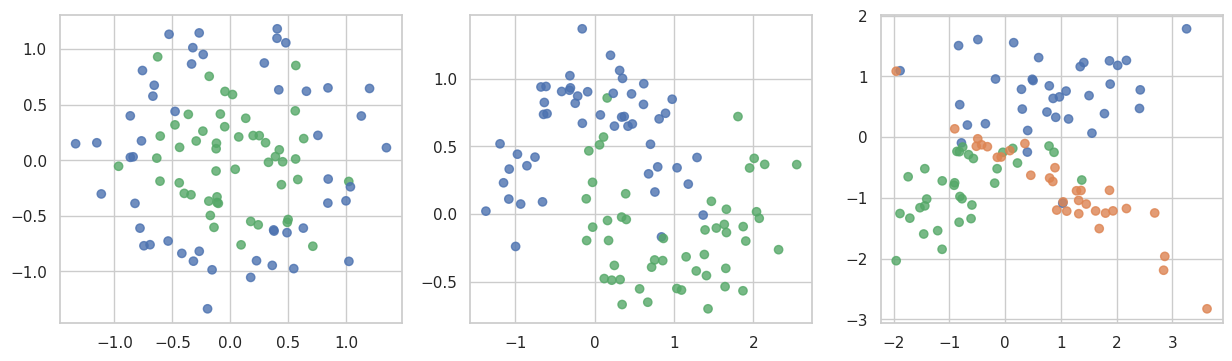

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

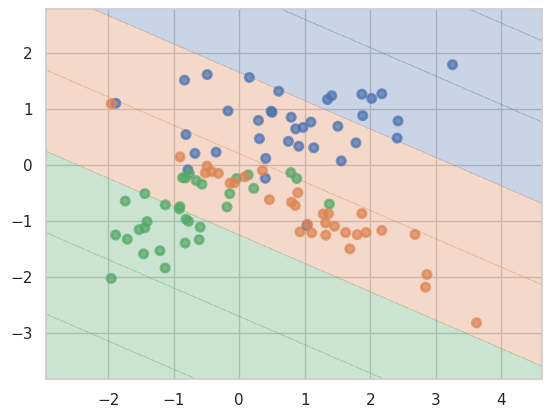

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

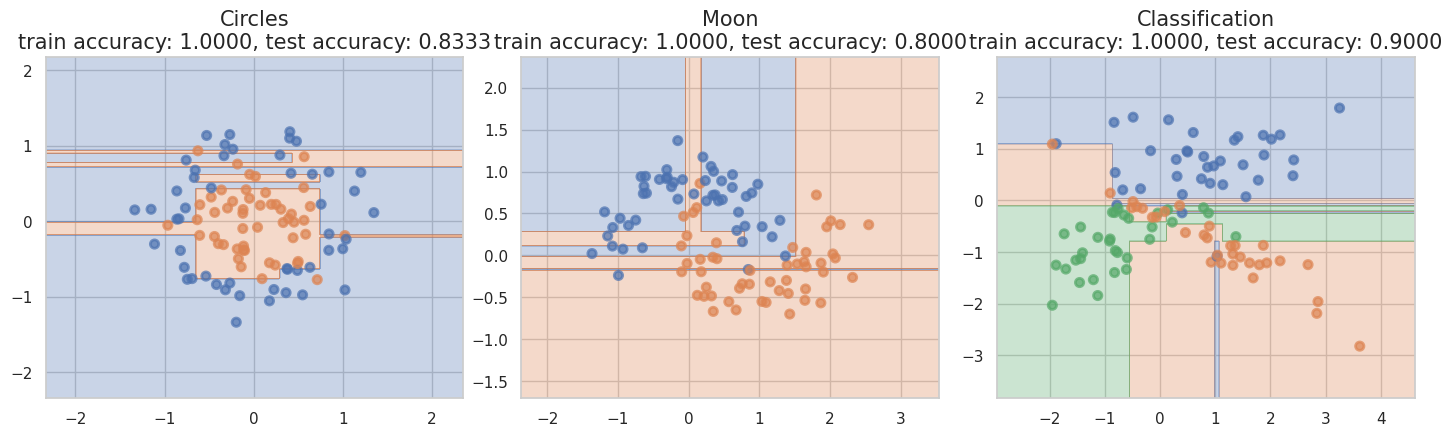

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

datasets_names = ['Circles', 'Moon', 'Classification']

plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

    # train classifier and compute accuracy
    classifier = DecisionTreeClassifier(random_state=777).fit(X_train, y_train)
    train_acc = accuracy_score(y_train, classifier.predict(X_train))
    test_acc = accuracy_score(y_test, classifier.predict(X_test))

    plt.subplot(1, 3, i + 1)
    plot_surface(classifier, X, y)
    plt.title('%s\ntrain accuracy: %.4f, test accuracy: %.4f' % (datasets_names[i], train_acc, test_acc), fontsize=15)

__Ответ:__ Явно видно сильное переобучение, тк много тонких разделений и на тесте слишком хорошая точность

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def tree_experements_visualizer(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

    plt.figure(figsize=(25, 15))
    for i, md in enumerate([1, 2, 6, 10, None]):
        for j, msl in enumerate([12, 6, 1]):
            # train classifier and compute accuracy
            classifier = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, random_state=777).fit(X_train, y_train)
            train_acc = accuracy_score(y_train, classifier.predict(X_train))
            test_acc = accuracy_score(y_test, classifier.predict(X_test))

            # code from plot_surface function
            plot_step = 0.01
            palette = sns.color_palette(n_colors=len(np.unique(y)))
            cmap = ListedColormap(palette)
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # visualize results
            plt.subplot2grid((5, 5), (i, j))
            plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                        edgecolors=np.array(palette)[y], linewidths=2)
            plt.title('%s\nmax_depth: %s, min_samples_leaf: %s\ntrain accuracy: %.4f, test accuracy: %.4f' %
                      (name, str(md), str(msl), train_acc, test_acc), fontsize=12)
    plt.show()

____________________________________________________________________________________________________
DATASET: Circles


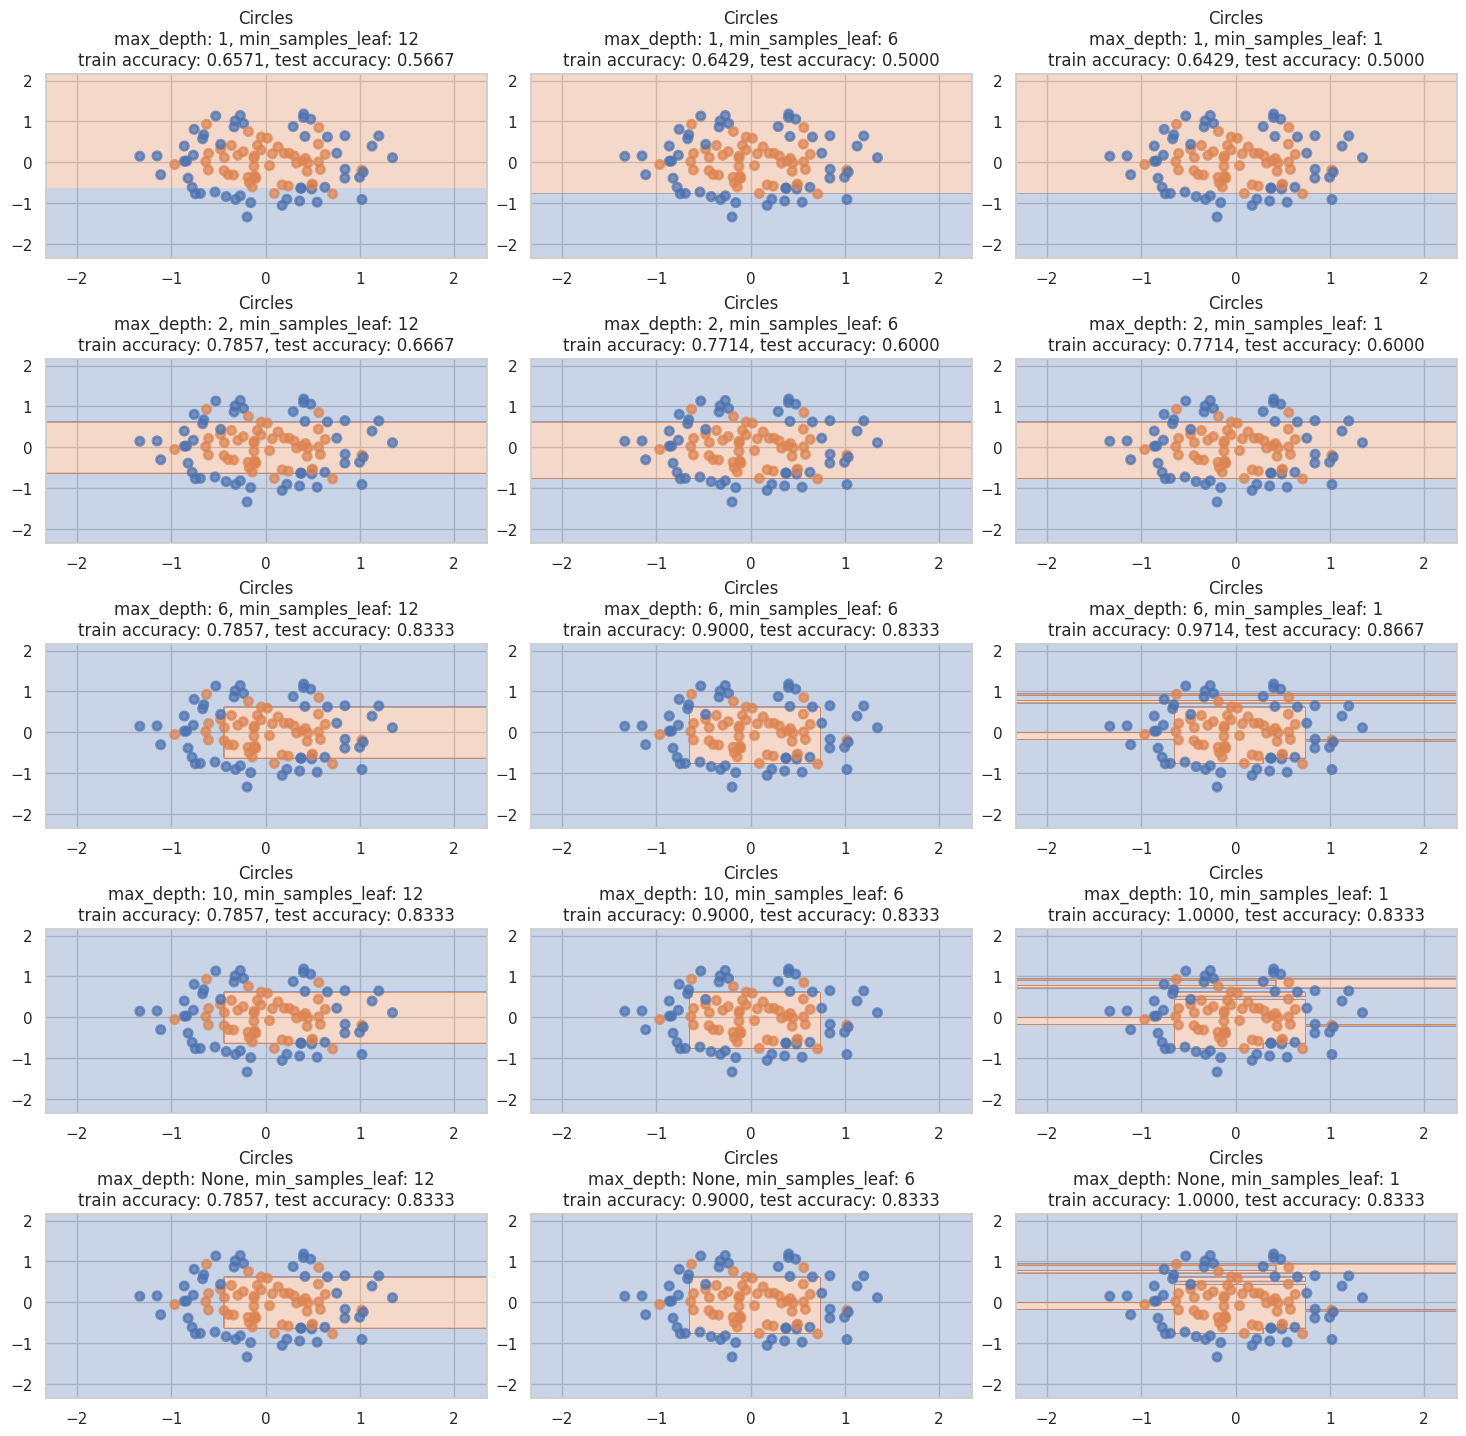

____________________________________________________________________________________________________
DATASET: Moon


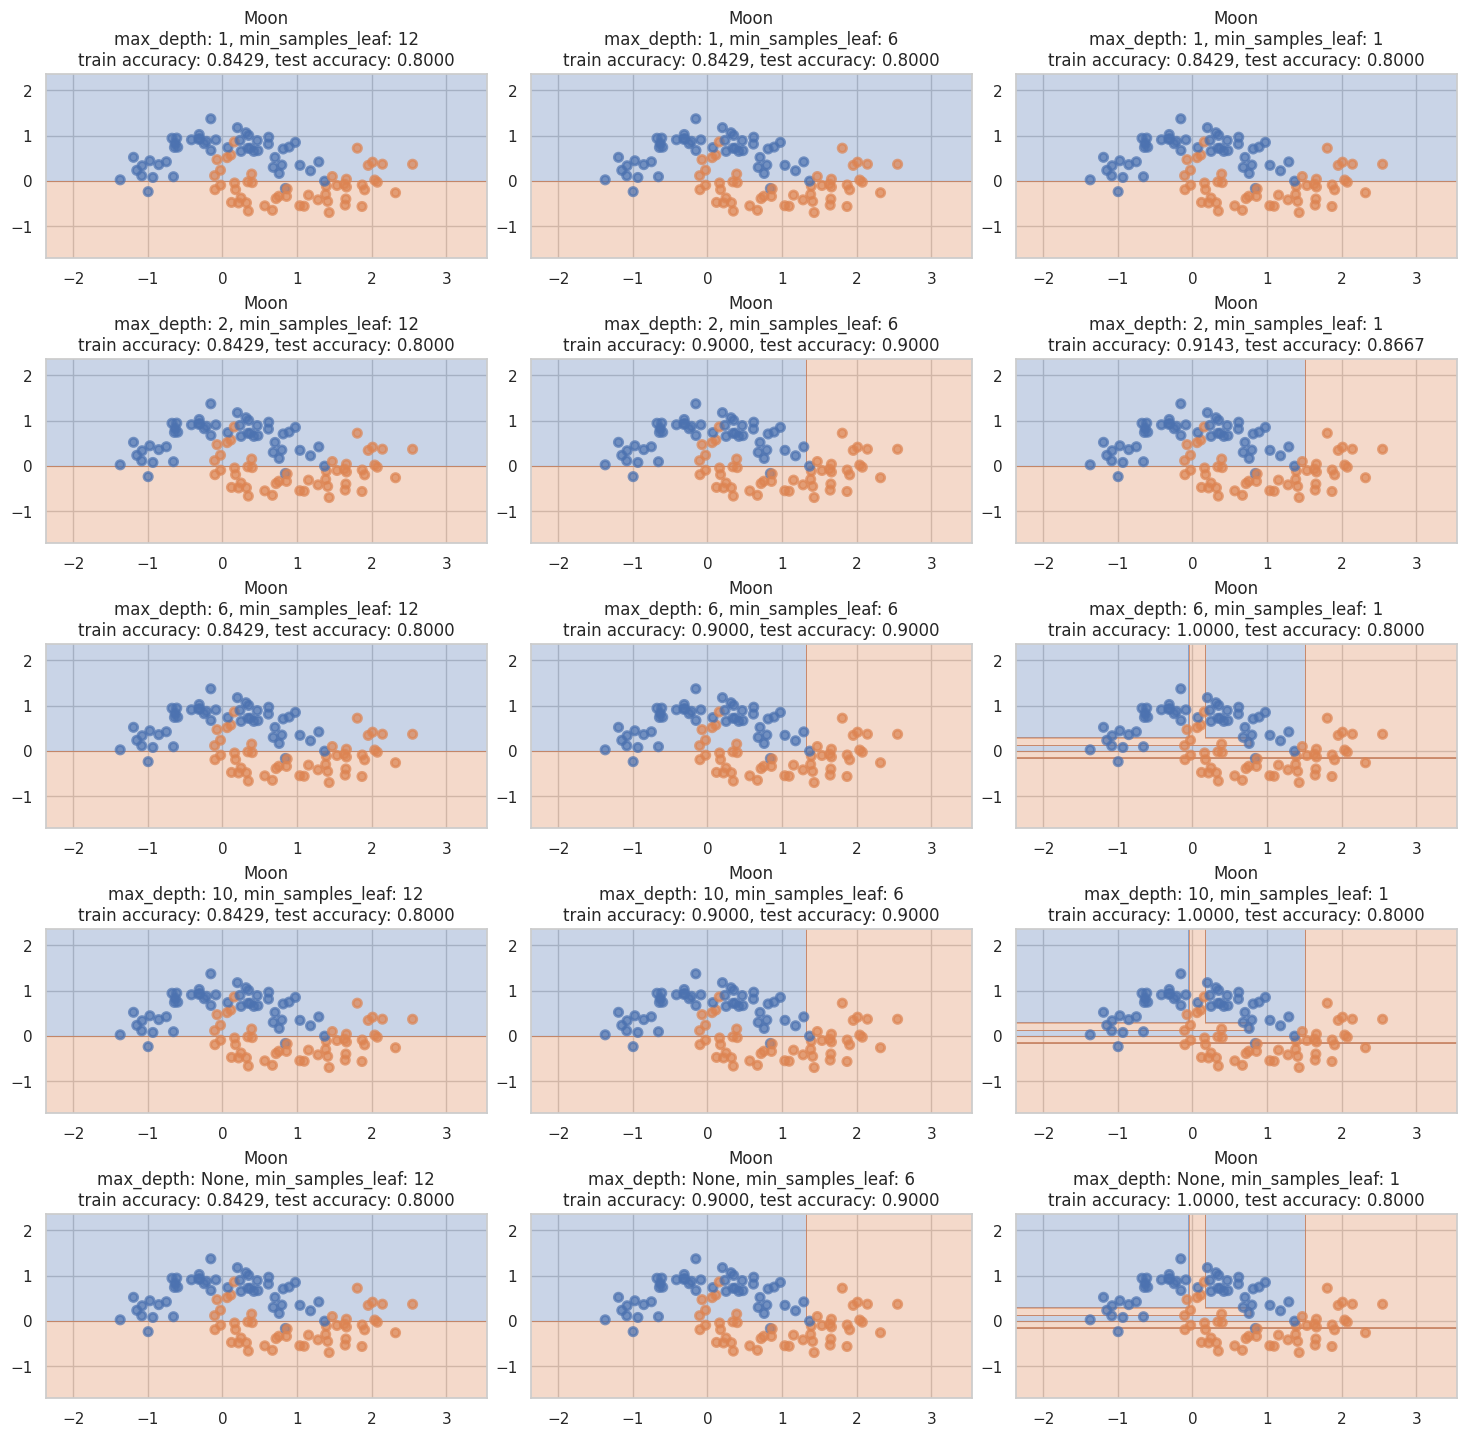

____________________________________________________________________________________________________
DATASET: Classification


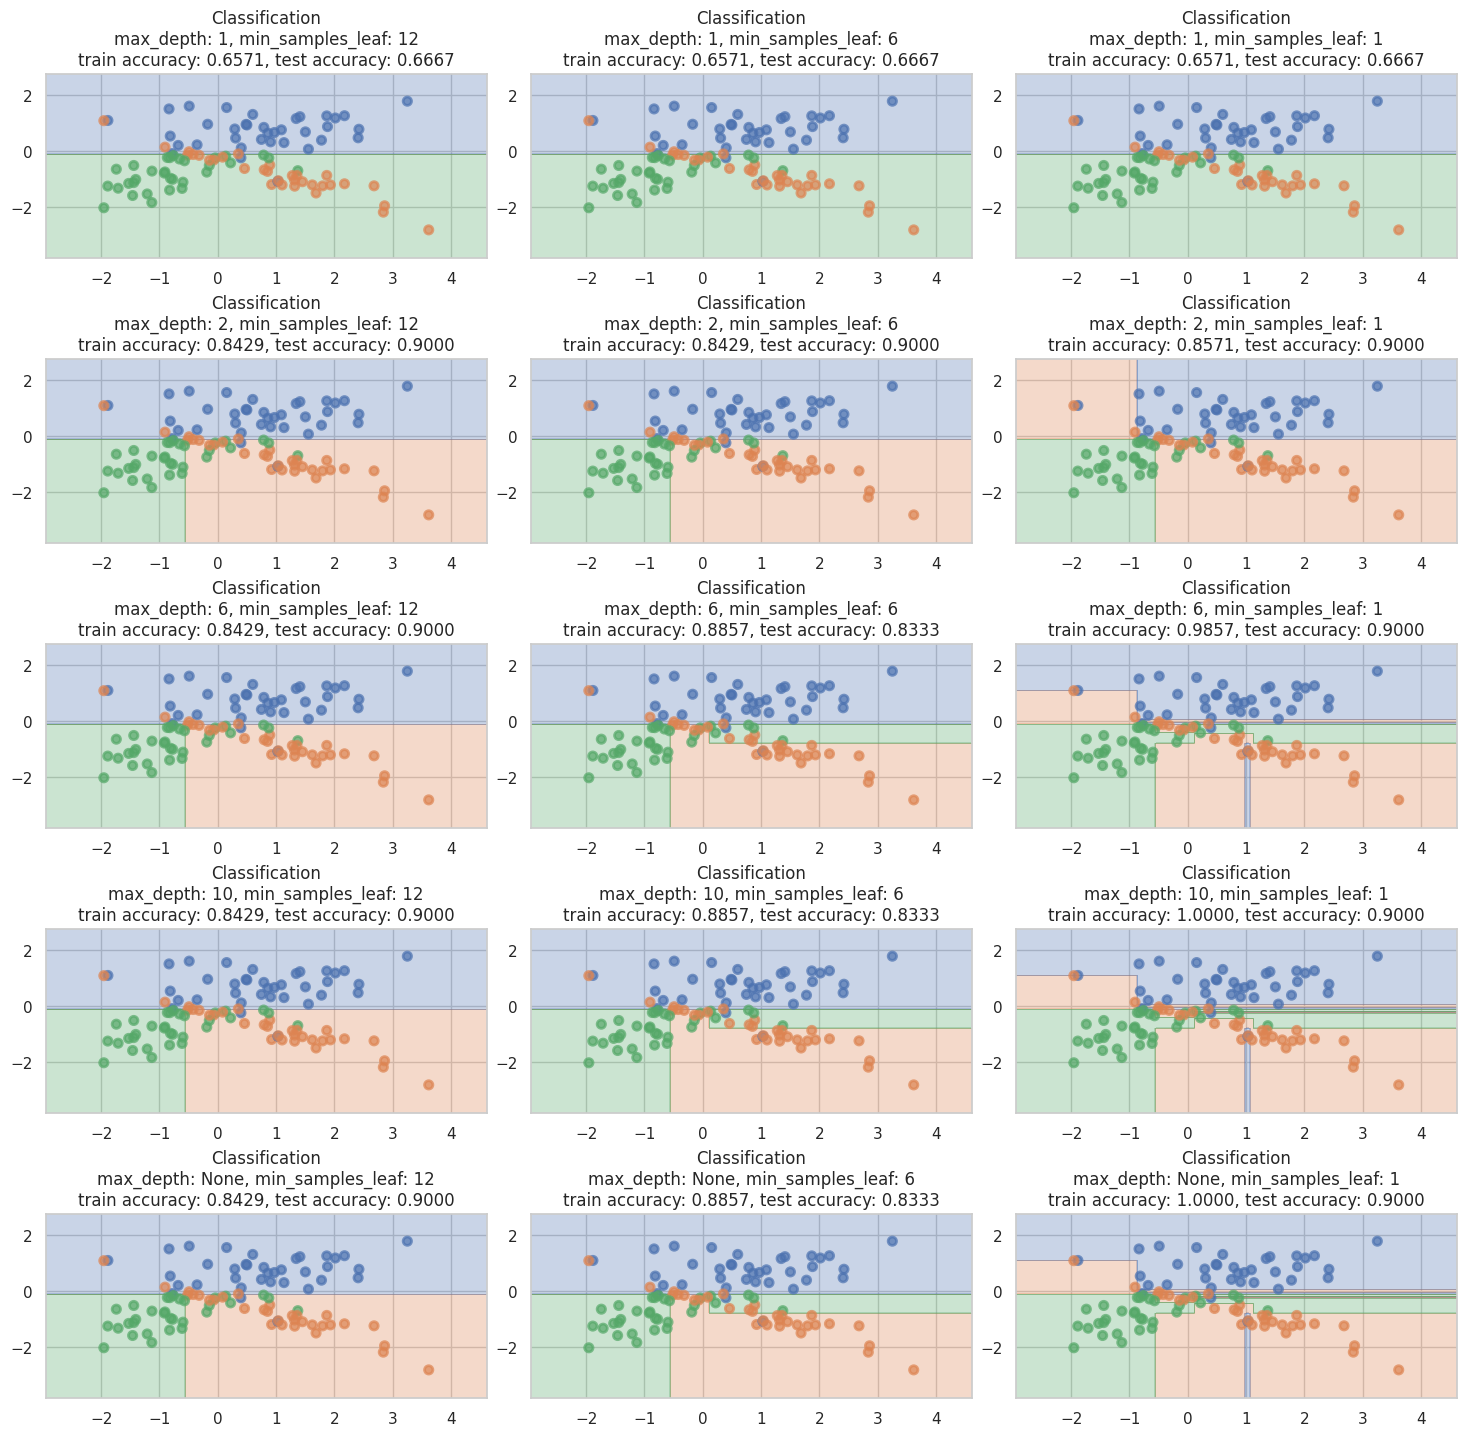

In [ ]:
for i, (X, y) in enumerate(datasets):
    print('_' * 100)
    print('DATASET: %s' % datasets_names[i])
    tree_experements_visualizer(X, y, datasets_names[i])

__Ответ:__ При увеличении глубины дерева и уменьшении допустимого минимального количества вершин в листе, дерево ожидаемо становится сложнее структурно и всё больше ловит объекты на трейне, ухудшая обощающую способность. В то же время модели с небольшой глубиной и большим допустимым минимальным значением объектов в листе очень плохо улавливают зависимости и дают плохие предсказания как на трейне, так и на тесте

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py
Посылка:
https://contest.yandex.ru/contest/72492/submits/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
import hw5code as tree_clf

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('students.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [ ]:
X, y = data.drop(columns='UNS'), data['UNS']

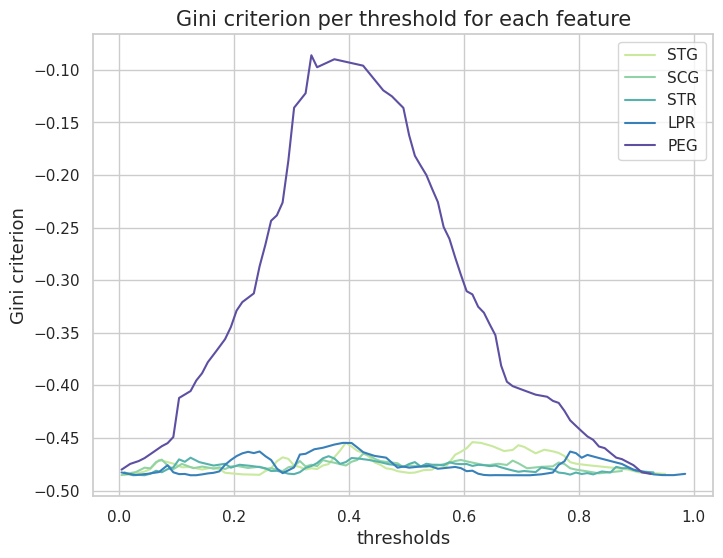

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_prop_cycle(color=plt.cm.Spectral(np.linspace(0.65, 1, len(X.columns))))
ax.set_title('Gini criterion per threshold for each feature', fontsize=15)
ax.set_xlabel('thresholds', fontsize=13)
ax.set_ylabel('Gini criterion', fontsize=13)
for feature in X.columns:
    thresholds, ginis, best_threshold, best_gini = tree_clf.find_best_split(X[feature], y)
    ax.plot(thresholds, ginis, label=feature)
ax.legend()
plt.show()

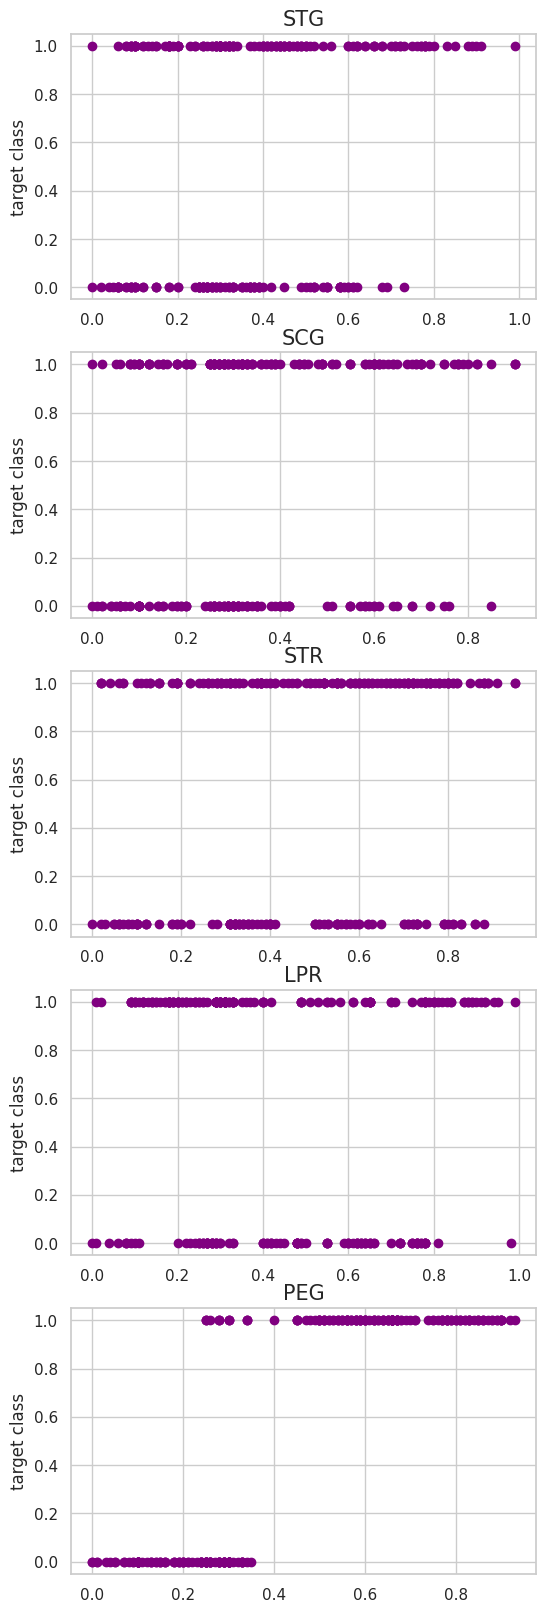

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(6, 20))
for i, feature in enumerate(X.columns):
    axs[i].scatter(X[feature], y, color='purple')
    axs[i].set_ylabel('target class')
    axs[i].set_title(feature, fontsize=15)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** На графике зависимости критерия Джини от порога для каждого признака кивая для PEG выделяется среди остальных. Она является хорошей кривой - сначала возрастает, а затем убывает, имея выраженый максимум.Остальные же прямые на графике больше близки к константной. Можно заметить, из графиков принадлежности классу в зависимости от значения признака, что признак PEG очень хорошо разделяет два класса (большинство значений меньших 0.4 лежат в классе 0, а все значения большие 0.4 лежат в классе 1). Значения других же признаков не даёт чёткого разделения таргета.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 Посылка: https://contest.yandex.ru/contest/72492/submits/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('agaricus-lepiota.data')
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
data = data.apply(LabelEncoder().fit_transform)

In [ ]:
X, y = data.drop(columns='p'), data['p']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=123)

In [ ]:
tree = tree_clf.DecisionTree(['categorical'] * X.shape[1])
tree.fit(X_train, y_train)
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

In [ ]:
print('Train accuracy: %.4f, test accuracy: %.4f' %
      (accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)))

Train accuracy: 1.0000, test accuracy: 1.0000


In [ ]:
len(tree._tree), data.shape

(5, (8123, 23))

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
).apply(LabelEncoder().fit_transform)

In [ ]:
X, y = data.drop(columns='positive'), data['positive']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=777)

In [ ]:
def experements_visualizer(X_train, X_test, y_train, y_test):
    best_config = {
        'max_depth' : 0,
        'min_samples_leaf' : 0,
        'min_samples_split' : 0,
    }
    best_accuracy = 0

    for i, md in enumerate([1, 5, 10, None]):
        for j, msl in enumerate([None, 100, 10, 1]):
            for k, mss in enumerate([None, 100, 10, 1]):
                # train classifier and compute accuracy
                classifier = tree_clf.DecisionTree(['categorical'] * X.shape[1],
                                                   max_depth=md,
                                                   min_samples_leaf=msl,
                                                   min_samples_split=mss)
                classifier.fit(X_train, y_train)
                train_acc = accuracy_score(y_train, classifier.predict(X_train))
                test_acc = accuracy_score(y_test, classifier.predict(X_test))

                print('max_depth: %s, min_samples_leaf: %s, min_samples_split: %s\ntrain accuracy: %.4f, test accuracy: %.4f' %
                          (str(md), str(msl), str(mss), train_acc, test_acc))
                if best_accuracy < test_acc:
                    best_config = {
                        'max_depth' : md,
                        'min_samples_leaf' : msl,
                        'min_samples_split' : mss,
                    }
                    best_accuracy = test_acc

            print('______')
        print('___________________________')
    return best_accuracy, best_config

In [ ]:
best_accuracy, best_config = experements_visualizer(X_train, X_test, y_train, y_test)

max_depth: 1, min_samples_leaf: None, min_samples_split: None
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: None, min_samples_split: 100
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: None, min_samples_split: 10
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: None, min_samples_split: 1
train accuracy: 0.7100, test accuracy: 0.6771
______
max_depth: 1, min_samples_leaf: 100, min_samples_split: None
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: 100, min_samples_split: 100
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: 100, min_samples_split: 10
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: 100, min_samples_split: 1
train accuracy: 0.7100, test accuracy: 0.6771
______
max_depth: 1, min_samples_leaf: 10, min_samples_split: None
train accuracy: 0.7100, test accuracy: 0.6771
max_depth: 1, min_samples_leaf: 

In [ ]:
best_accuracy, best_config

(0.9444444444444444,
 {'max_depth': 10, 'min_samples_leaf': None, 'min_samples_split': None})

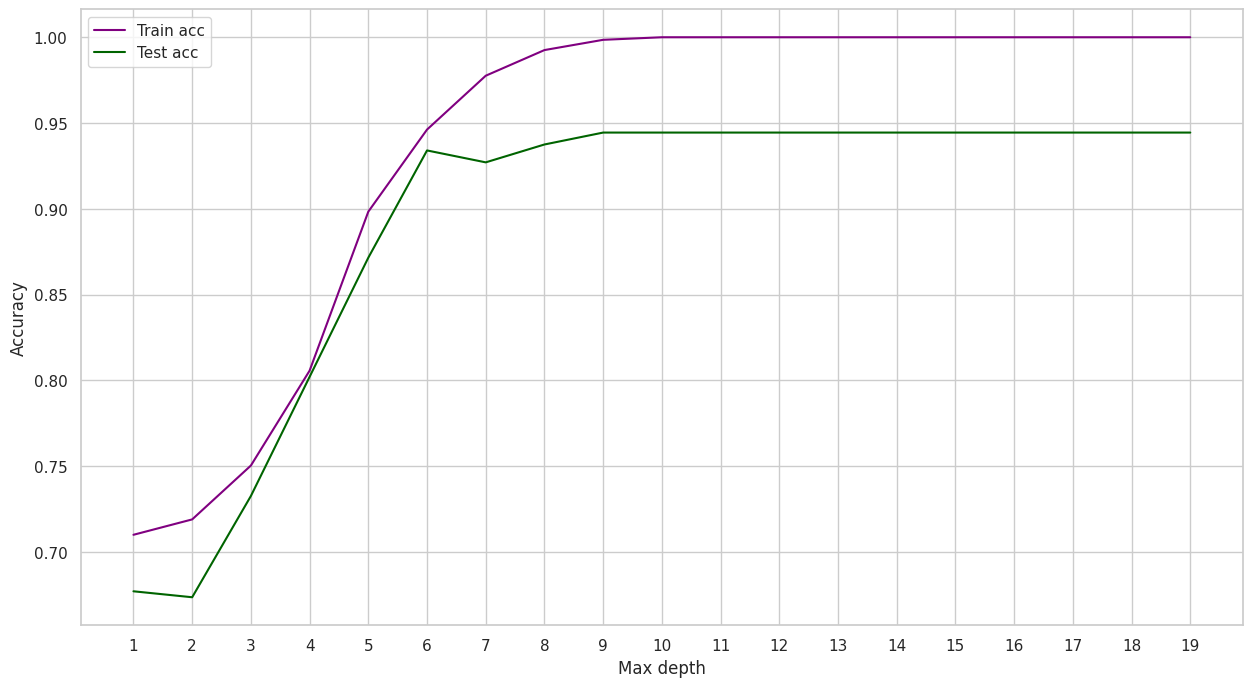

In [ ]:
# Max depth
train_acc, test_acc = [], []
max_depths = np.arange(1, 20)
for i, max_depth in enumerate(max_depths):
    classifier = tree_clf.DecisionTree(['categorical'] * X.shape[1], max_depth=max_depth)
    classifier.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_acc.append(accuracy_score(y_test, classifier.predict(X_test)))


plt.figure(figsize=(15, 8))
plt.plot(max_depths, train_acc, label='Train acc', color='purple')
plt.plot(max_depths, test_acc, label='Test acc', color='darkgreen')
plt.xticks(max_depths)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

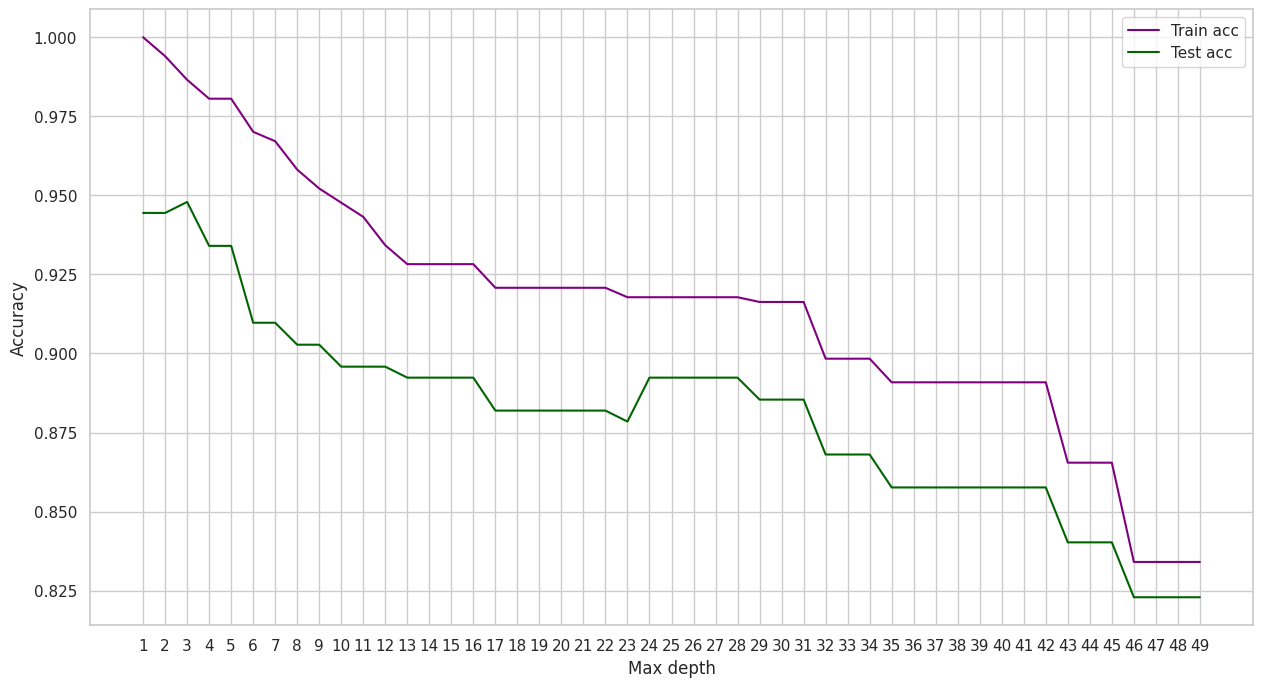

In [ ]:
# Min samples split
train_acc, test_acc = [], []
min_samples_splits = np.arange(1, 50)
for i, min_samples_split in enumerate(min_samples_splits):
    classifier = tree_clf.DecisionTree(['categorical'] * X.shape[1], min_samples_split=min_samples_split)
    classifier.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_acc.append(accuracy_score(y_test, classifier.predict(X_test)))


plt.figure(figsize=(15, 8))
plt.plot(min_samples_splits, train_acc, label='Train acc', color='purple')
plt.plot(min_samples_splits, test_acc, label='Test acc', color='darkgreen')
plt.xticks(min_samples_splits)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

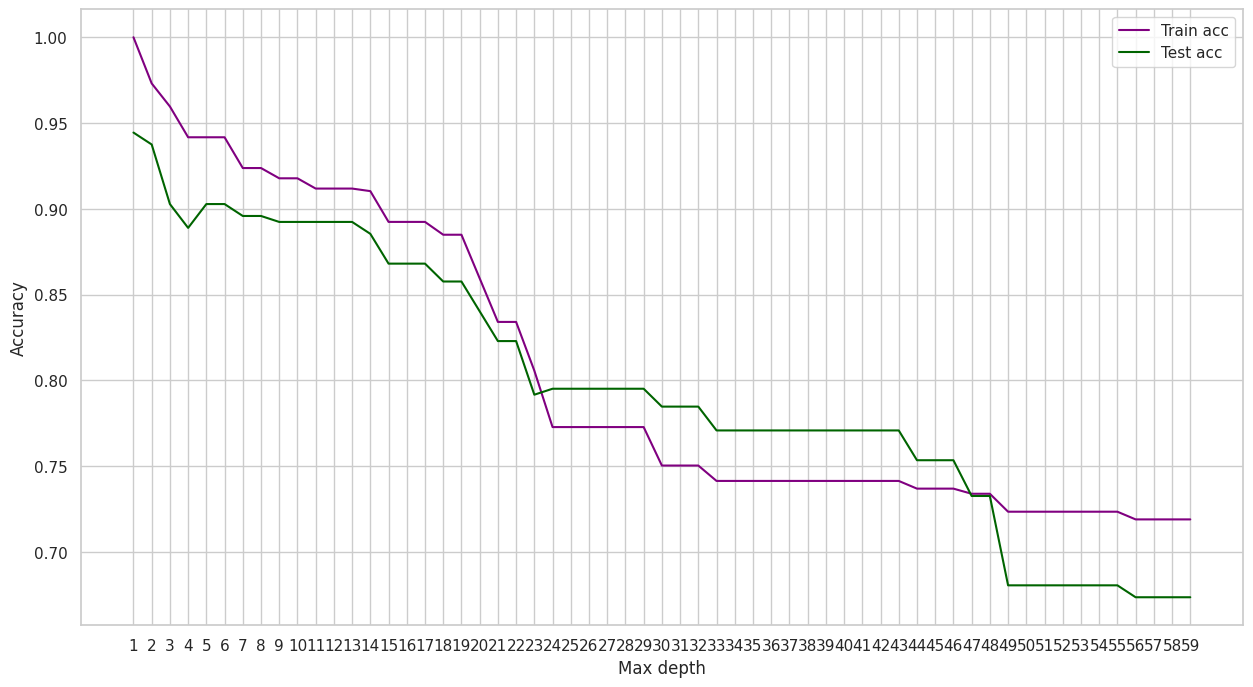

In [ ]:
# Min samples leaf
train_acc, test_acc = [], []
min_samples_leaves = np.arange(1, 60)
for i, min_samples_leaf in enumerate(min_samples_leaves):
    classifier = tree_clf.DecisionTree(['categorical'] * X.shape[1], min_samples_leaf=min_samples_leaf)
    classifier.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, classifier.predict(X_train)))
    test_acc.append(accuracy_score(y_test, classifier.predict(X_test)))


plt.figure(figsize=(15, 8))
plt.plot(min_samples_leaves, train_acc, label='Train acc', color='purple')
plt.plot(min_samples_leaves, test_acc, label='Test acc', color='darkgreen')
plt.xticks(min_samples_leaves)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: